In [1]:
pip install requests networkx matplotlib numpy


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


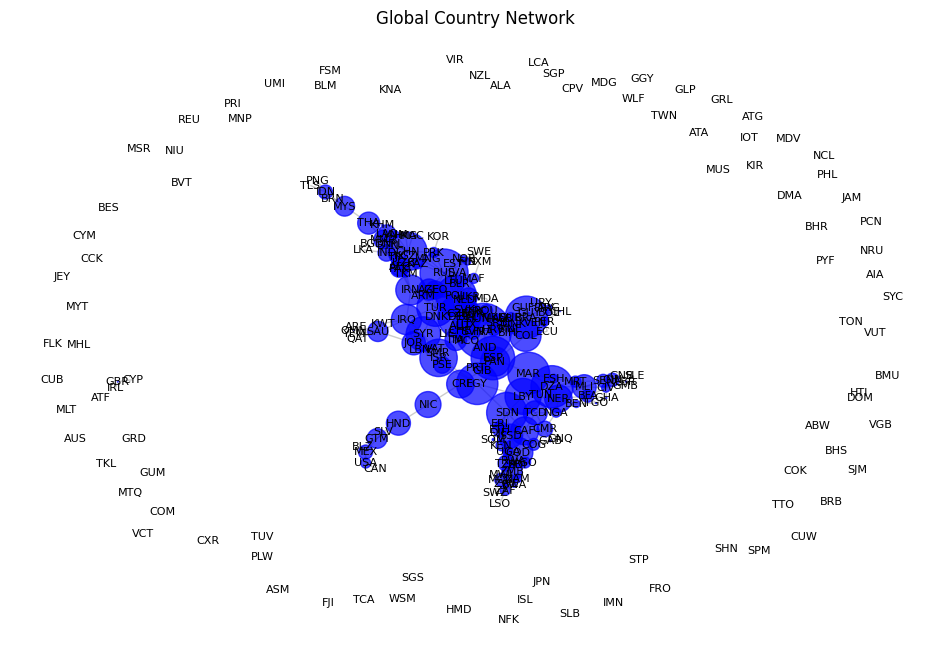

Top 5 Important Countries (by Betweenness Centrality):
France 0.16131008588490914
Russian Federation 0.11977620336839187
Spain 0.09817710672734785
Germany 0.09630824921673393
Brazil 0.09259349224856415


In [2]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
def fetch_countries_data():
    url = "https://restcountries.com/v2/all"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return []
def build_graph(countries):
    G = nx.Graph()
    for country in countries:
        country_code = country.get('alpha3Code')
        if country_code:
            G.add_node(country_code, name=country.get('name', 'Unknown'))
            borders = country.get('borders', [])
            for border in borders:
                if border:
                    G.add_edge(country_code, border)
    return G
def analyze_graph(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    return degree_centrality, betweenness_centrality
def visualize_graph(G, centrality):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    node_size = [v * 10000 for v in centrality.values()]
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='blue', alpha=0.7)
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title("Global Country Network")
    plt.axis('off')
    plt.show()
countries_data = fetch_countries_data()
G = build_graph(countries_data)
degree_centrality, betweenness_centrality = analyze_graph(G)
visualize_graph(G, betweenness_centrality)
top_countries = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Important Countries (by Betweenness Centrality):")
for code, centrality in top_countries:
    print(G.nodes[code].get('name', 'Unknown'), centrality)